# YZV 475E - DATA VISUALIZATION TERM PROJECT

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 500)
df = pd.read_csv("data/apartments_for_rent_classified_100K.csv", encoding="ISO-8859-1", sep=';')

C:\Users\deniz\AppData\Local\Temp\ipykernel_29848\3538347836.py:7: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/apartments_for_rent_classified_100K.csv", encoding="ISO-8859-1", sep=';')


In [2]:
df.head()

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668640009,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",NaN,1.0,1.0,USD,No,Thumbnail,Cats,2195.0,"$2,195",Monthly,542,507 509 Esplanade,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1577360355
1,5668639818,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",NaN,1.5,3.0,USD,No,Thumbnail,"Cats,Dogs",1250.0,"$1,250",Monthly,1500,146 Lochview Dr,Newport News,VA,37.0867,-76.4941,RentLingo,1577360340
2,5668639686,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,NaN,2.0,3.0,USD,No,Thumbnail,NaN,1395.0,"$1,395",Monthly,1650,3101 Morningside Dr,Raleigh,NC,35.8230,-78.6438,RentLingo,1577360332
3,5668639659,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",NaN,1.0,2.0,USD,No,Thumbnail,"Cats,Dogs",1600.0,"$1,600",Monthly,820,209 Aegean Way,Vacaville,CA,38.3622,-121.9712,RentLingo,1577360330
4,5668639374,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",NaN,1.0,1.0,USD,No,Thumbnail,"Cats,Dogs",975.0,$975,Monthly,624,4805 Marquette NE,Albuquerque,NM,35.1038,-106.6110,RentLingo,1577360308


# Data Cleaning

In [3]:
# Display the shape of the dataset (rows, columns)
print("Shape of the dataset:")
print(df.shape)

Shape of the dataset:
(99492, 22)


In [4]:
# Check for duplicate rows
print("Number of duplicate rows:")
print(df.duplicated().sum())

Number of duplicate rows:
84


In [5]:
df.drop_duplicates(inplace=True)

In [6]:
# Display basic information about the dataset
print("Information about the dataset:")
print(df.info())

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 99408 entries, 0 to 99491
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             99408 non-null  int64  
 1   category       99408 non-null  object 
 2   title          99408 non-null  object 
 3   body           99408 non-null  object 
 4   amenities      83374 non-null  object 
 5   bathrooms      99345 non-null  float64
 6   bedrooms       99284 non-null  float64
 7   currency       99408 non-null  object 
 8   fee            99408 non-null  object 
 9   has_photo      99408 non-null  object 
 10  pets_allowed   39034 non-null  object 
 11  price          99407 non-null  float64
 12  price_display  99407 non-null  object 
 13  price_type     99408 non-null  object 
 14  square_feet    99408 non-null  int64  
 15  address        7942 non-null   object 
 16  cityname       99106 non-null  object 
 17  state          99106 non

In [7]:
# Check for missing values in each column
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
id                   0
category             0
title                0
body                 0
amenities        16034
bathrooms           63
bedrooms           124
currency             0
fee                  0
has_photo            0
pets_allowed     60374
price                1
price_display        1
price_type           0
square_feet          0
address          91466
cityname           302
state              302
latitude            25
longitude           25
source               0
time                 0
dtype: int64


In [8]:
# Dropping rows
df = df[~df['latitude'].isna()]
df = df[~df['longitude'].isna()]
df = df[~df['bedrooms'].isna()]
df = df[~df['bathrooms'].isna()]
df = df[~df['cityname'].isna()]
df = df[~df['state'].isna()]
df = df[~df['price'].isna()]

In [9]:
# Convert to datetime object
df['time'] = pd.to_datetime(df['time'], unit='s')

# Convert to int
df['bathrooms'] = df['bathrooms'].astype(int)
df['bedrooms'] = df['bedrooms'].astype(int)

In [10]:
# Values that are redundant because they have very dominant values.
# So we can guess all renting posts are monthly in USD, have no fee, and are apartments.
print(df['category'].value_counts(), '\n')
print(df['currency'].value_counts(), '\n')
print(df['fee'].value_counts(), '\n')
print(df['price_type'].value_counts(), '\n')

# First drop outlier rows
df = df[df['category'] == 'housing/rent/apartment']
df = df[df['price_type'] == 'Monthly'] 

category
housing/rent/apartment            98863
housing/rent/commercial/retail       42
housing/rent                          7
housing/rent/home                     4
housing/rent/short_term               3
housing/rent/condo                    3
housing/rent/other                    1
Name: count, dtype: int64 

currency
USD    98923
Name: count, dtype: int64 

fee
No     98726
Yes      197
Name: count, dtype: int64 

price_type
Monthly    98920
Weekly         3
Name: count, dtype: int64 



In [11]:
# Then drop columns as they are redundant
df.drop(columns=['currency', 'fee', 'category', 'price_type'], inplace=True)

# Drop more unecessary columns
df.drop(columns=['title', 'body', 'has_photo', 'pets_allowed', 'pets_allowed', 'address', 'price_display', 'source'], inplace=True)

In [12]:
df

,id,amenities,bathrooms,bedrooms,price,square_feet,cityname,state,latitude,longitude,time
0,5668640009,NaN,1,1,2195.0,542,Redondo Beach,CA,33.8520,-118.3759,2019-12-26 11:39:15
1,5668639818,NaN,1,3,1250.0,1500,Newport News,VA,37.0867,-76.4941,2019-12-26 11:39:00
2,5668639686,NaN,2,3,1395.0,1650,Raleigh,NC,35.8230,-78.6438,2019-12-26 11:38:52
3,5668639659,NaN,1,2,1600.0,820,Vacaville,CA,38.3622,-121.9712,2019-12-26 11:38:50
4,5668639374,NaN,1,1,975.0,624,Albuquerque,NM,35.1038,-106.6110,2019-12-26 11:38:28
...,...,...,...,...,...,...,...,...,...,...,...
99487,5121219946,"Gym,Parking,Patio/Deck,Playground,Storage,Wood...",1,1,780.0,605,Houston,TX,29.6151,-95.1998,2018-12-07 12:29:30
99488,5121219696,"AC,Cable or Satellite,Clubhouse,Dishwasher,Gym...",2,2,813.0,921,Jacksonville,FL,30.2254,-81.7579,2018-12-07 12:29:10
99489,5121219420,"Garbage Disposal,Refrigerator",1,1,1325.0,650,San Diego,CA,32.7379,-117.0914,2018-12-07 12:28:49
99490,5121218935,"Gym,Pool",1,1,931.0,701,Huntersville,NC,35.4158,-80.8451,2018-12-07 12:27:50


# Data Analysis

## Finding Outliers

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Example data loading
# df = pd.read_csv('your_dataset.csv')  # Replace with your dataset loading method

# Calculate Z-scores for both 'price' and 'square_feet'
df['price_zscore'] = zscore(df['price'])
df['square_feet_zscore'] = zscore(df['square_feet'])

# Identify outliers for both columns
outliers = df[
    (abs(df['price_zscore']) > 15) | (abs(df['square_feet_zscore']) > 15)
]

# Remove outliers
df_cleaned = df[
    (abs(df['price_zscore']) <= 15) & (abs(df['square_feet_zscore']) <= 15)
]

df_cleaned.drop(columns=['price_zscore', 'square_feet_zscore'], inplace=True)

C:\Users\deniz\AppData\Local\Temp\ipykernel_29848\1488094611.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(columns=['price_zscore', 'square_feet_zscore'], inplace=True)


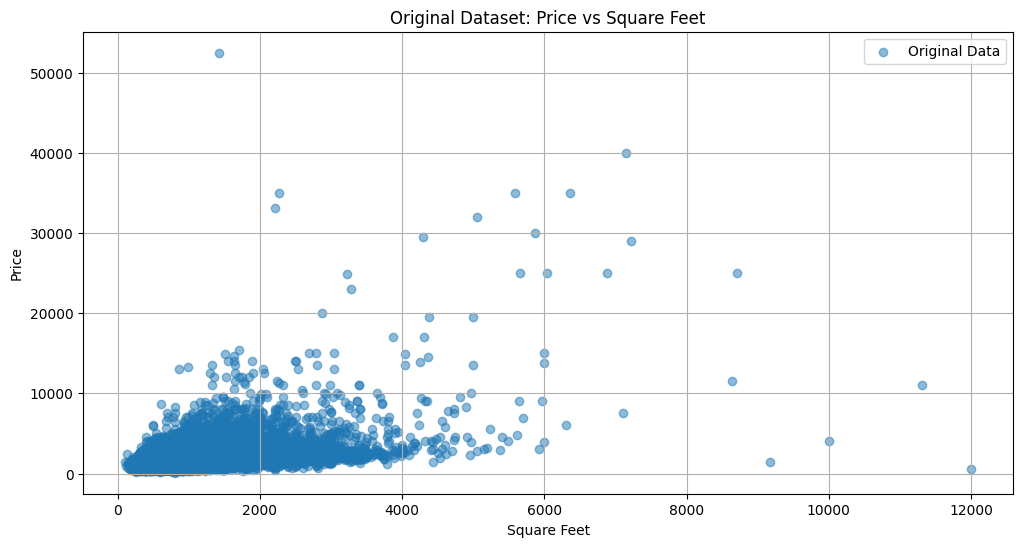

In [14]:
# Visualize the original dataset
plt.figure(figsize=(12, 6))
plt.scatter(df['square_feet'], df['price'], alpha=0.5, label="Original Data")
plt.title("Original Dataset: Price vs Square Feet")
plt.xlabel("Square Feet")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

The scatter plot of the original dataset shows the relationship between rental prices and square footage. The data points are widely dispersed, indicating a diverse range of property sizes and prices. While most data points are concentrated in a specific range, some extreme values suggest potential outliers in the dataset.

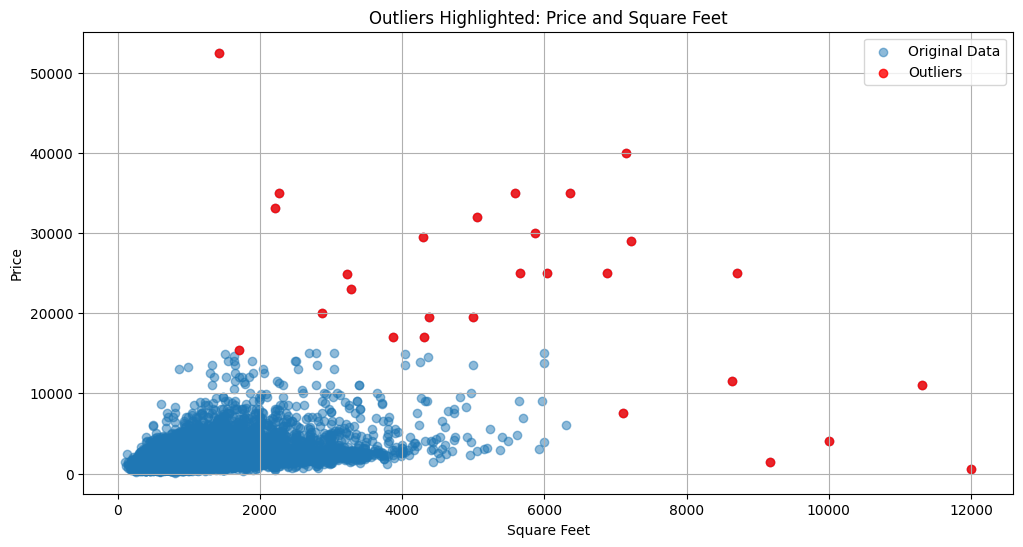

In [15]:
# Visualize the outliers
plt.figure(figsize=(12, 6))
plt.scatter(df['square_feet'], df['price'], alpha=0.5, label="Original Data")
plt.scatter(outliers['square_feet'], outliers['price'], color='red', label="Outliers", alpha=0.8)
plt.title("Outliers Highlighted: Price and Square Feet")
plt.xlabel("Square Feet")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

Using Z-scores, outliers were identified for both rental price and square footage, where Z-scores greater than 15 were flagged. In the scatter plot, these outliers are marked in red, clearly separating them from the rest of the data. This visualization highlights extreme property values that could skew overall trends and analysis.

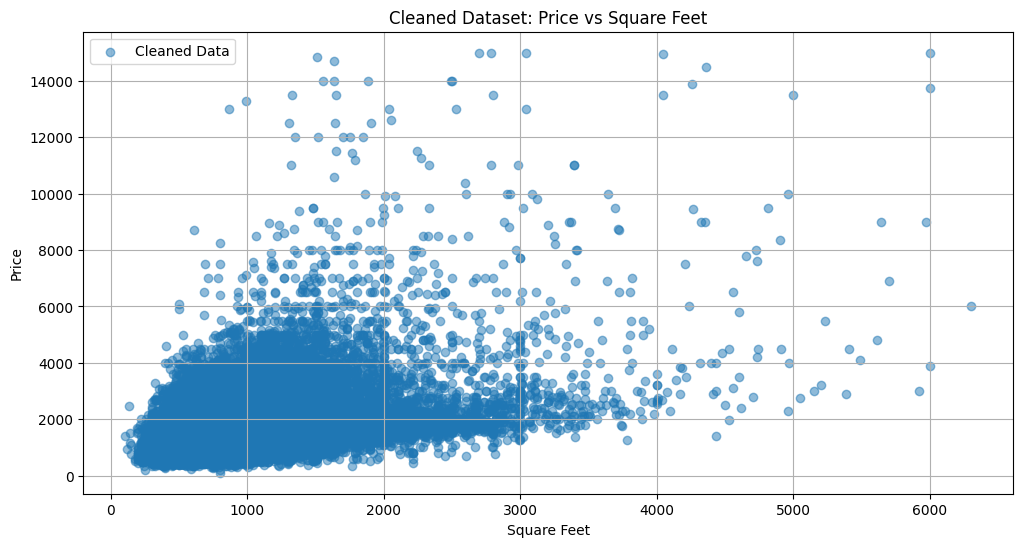

In [16]:
# Visualize the cleaned dataset
plt.figure(figsize=(12, 6))
plt.scatter(df_cleaned['square_feet'], df_cleaned['price'], alpha=0.5, label="Cleaned Data")
plt.title("Cleaned Dataset: Price vs Square Feet")
plt.xlabel("Square Feet")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

The cleaned dataset scatter plot excludes the identified outliers, resulting in a more cohesive and dense cluster of data points. This visualization makes it easier to observe the relationship between rental prices and square footage without interference from extreme values. The cleaned data is more suitable for reliable analysis and modeling.

c:\Users\deniz\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


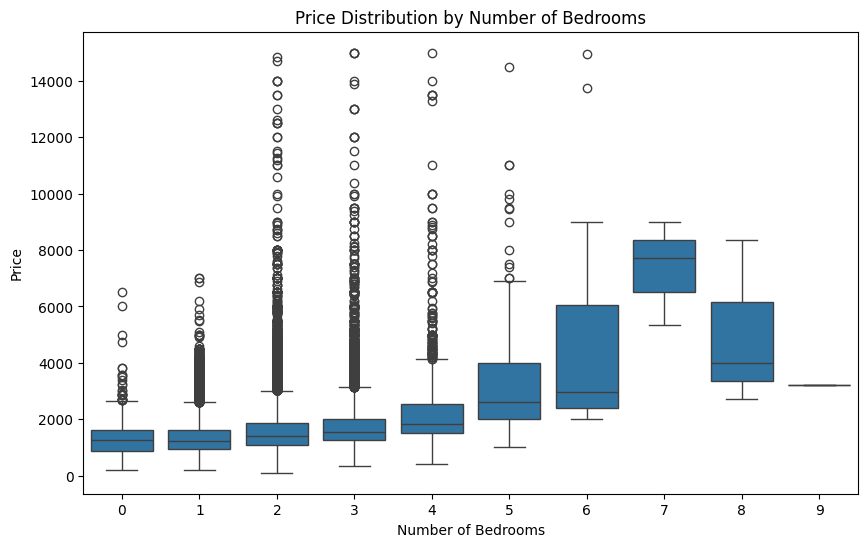

C:\Users\deniz\AppData\Local\Temp\ipykernel_29848\3997267688.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  bounds = df.groupby(group_col).apply(outlier_bounds)
c:\Users\deniz\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


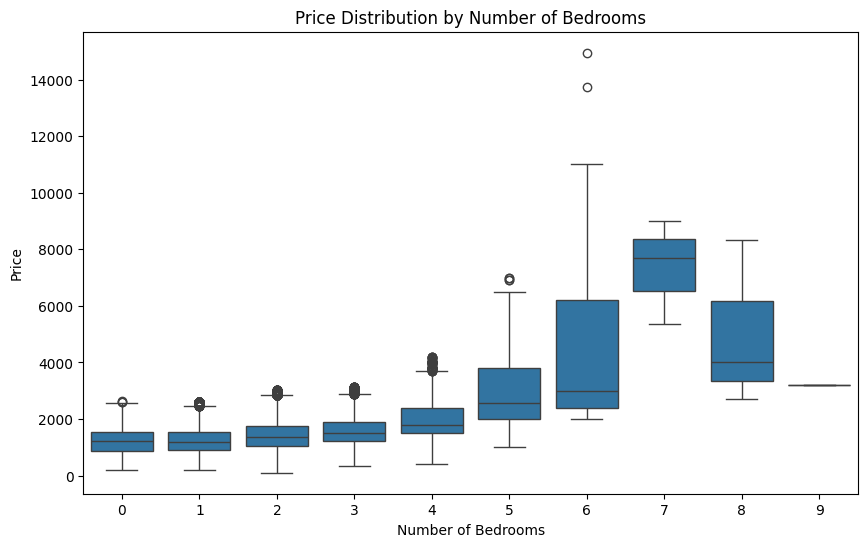

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='bedrooms', y='price', data=df_cleaned)
plt.title('Price Distribution by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()

# Function to remove outliers by group
def remove_outliers(df, group_col, target_col):
    def outlier_bounds(sub_df):
        Q1 = sub_df[target_col].quantile(0.25)
        Q3 = sub_df[target_col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return pd.Series({'lower_bound': lower_bound, 'upper_bound': upper_bound})

    # Compute bounds for each group
    bounds = df.groupby(group_col).apply(outlier_bounds)

    # Function to filter rows
    def filter_data(row):
        lb, ub = bounds.loc[row[group_col]]
        return lb <= row[target_col] <= ub

    # Apply filter
    return df[df.apply(filter_data, axis=1)]


df_cleaned = remove_outliers(df, 'bedrooms', 'price')

plt.figure(figsize=(10, 6))
sns.boxplot(x='bedrooms', y='price', data=df_cleaned)
plt.title('Price Distribution by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()

The analysis investigates the relationship between rental prices and the number of bedrooms using boxplots. Initially, a boxplot was created to visualize the price distribution for each bedroom count, revealing significant variations and the presence of numerous outliers, particularly for properties with 2 to 4 bedrooms. To address this, a custom function was used to calculate interquartile ranges (IQR) for each group (number of bedrooms) and remove outliers based on the 1.5 IQR rule. After outlier removal, the cleaned data was visualized again, showcasing a more representative distribution of rental prices across different bedroom counts. The cleaned boxplot illustrates a clearer trend: as the number of bedrooms increases, the median rental price also rises, particularly for properties with 6 or more bedrooms, while reducing the impact of extreme values.

## Distribution Analysis

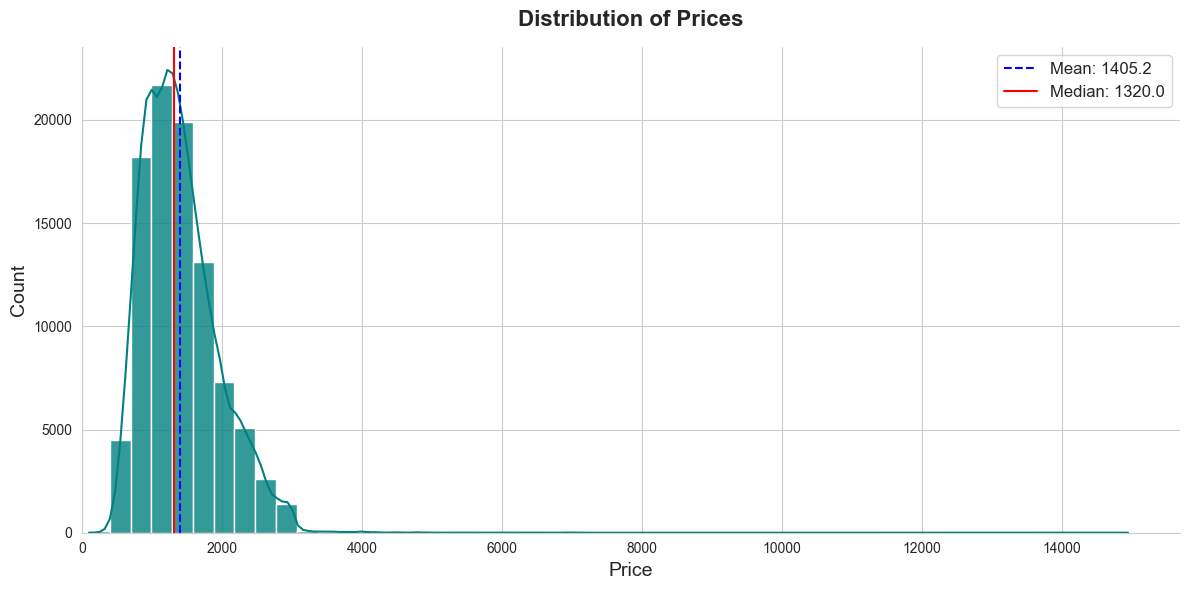

In [18]:
sns.set_style('whitegrid') 
plt.figure(figsize=(12, 6))

# Histogram of Price
mean_price = df_cleaned['price'].mean()
median_price = df_cleaned['price'].median()

sns.histplot(data=df_cleaned, x='price', bins=50, kde=True, color='teal', alpha=0.8)
plt.axvline(mean_price, color='blue', linestyle='--', linewidth=1.5, label=f'Mean: {mean_price:.1f}')
plt.axvline(median_price, color='red', linestyle='-', linewidth=1.5, label=f'Median: {median_price:.1f}')
plt.xlim(left=0) 
plt.ylim(bottom=0) 
plt.title("Distribution of Prices", fontsize=16, fontweight='bold', pad=15)
plt.xlabel("Price", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.legend(frameon=True, fontsize=12, loc='upper right')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()


The histogram of prices illustrates the rental price distribution, with a clear skew towards lower values. The mean price is approximately $1,405.20, while the median price is slightly lower at $1,320. This skew suggests that most properties fall in the affordable range, but there are some high-end properties pulling the mean upward.

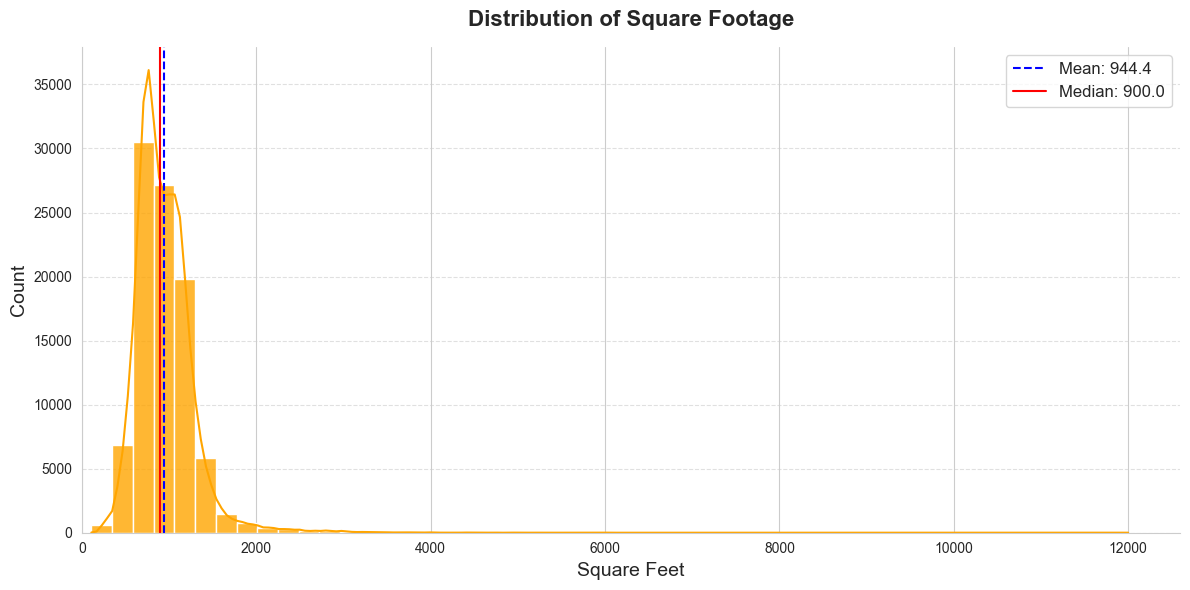

In [19]:
# Histogram of Square Footage
mean_sqft = df_cleaned['square_feet'].mean()
median_sqft = df_cleaned['square_feet'].median()

plt.figure(figsize=(12, 6))
sns.histplot(data=df_cleaned, x='square_feet', bins=50, kde=True, color='orange', alpha=0.8)

plt.axvline(mean_sqft, color='blue', linestyle='--', linewidth=1.5, label=f'Mean: {mean_sqft:.1f}')
plt.axvline(median_sqft, color='red', linestyle='-', linewidth=1.5, label=f'Median: {median_sqft:.1f}')

plt.xlim(left=0)
plt.ylim(bottom=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.gca().set_facecolor('white')
plt.title("Distribution of Square Footage", fontsize=16, fontweight='bold', pad=15)
plt.xlabel("Square Feet", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.legend(frameon=True, fontsize=12, loc='upper right')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()


The square footage histogram shows a similar skewed distribution, with most properties clustered around smaller sizes. The mean size is 944.4 square feet, while the median is slightly smaller at 900 square feet, indicating that compact apartments are more common in this dataset.

C:\Users\deniz\AppData\Local\Temp\ipykernel_29848\2690192556.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='bedrooms', palette='coolwarm', order=sorted(df_cleaned['bedrooms'].unique()))
c:\Users\deniz\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\deniz\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  dat

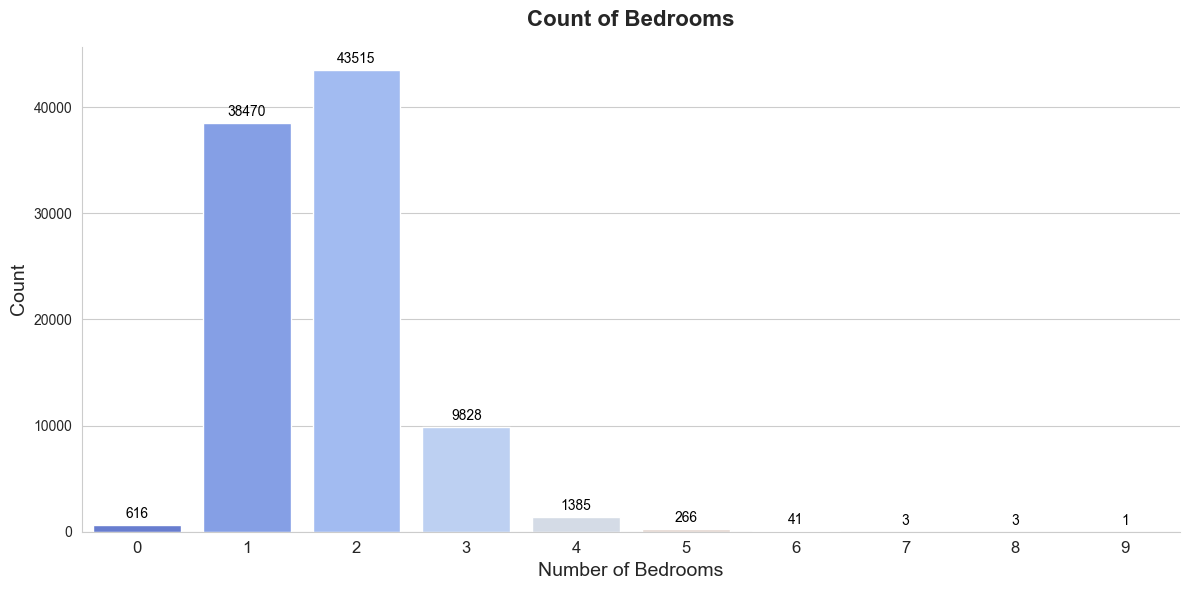

In [20]:
plt.figure(figsize=(12, 6))

sns.countplot(data=df_cleaned, x='bedrooms', palette='coolwarm', order=sorted(df_cleaned['bedrooms'].unique()))

for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%d', label_type='edge', fontsize=10, color='black', padding=3)

plt.title("Count of Bedrooms", fontsize=16, fontweight='bold', pad=15)
plt.xlabel("Number of Bedrooms", fontsize=14)
plt.ylabel("Count", fontsize=14)

plt.xticks(fontsize=12)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()


The count plot of bedrooms highlights that the majority of rental properties have 1 or 2 bedrooms, with a sharp decline in listings for properties with more than 2 bedrooms. This suggests a focus on smaller, more economical living spaces.

C:\Users\deniz\AppData\Local\Temp\ipykernel_29848\1291302220.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='bathrooms', palette='viridis', order=sorted(df['bathrooms'].unique()))
c:\Users\deniz\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\deniz\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grou

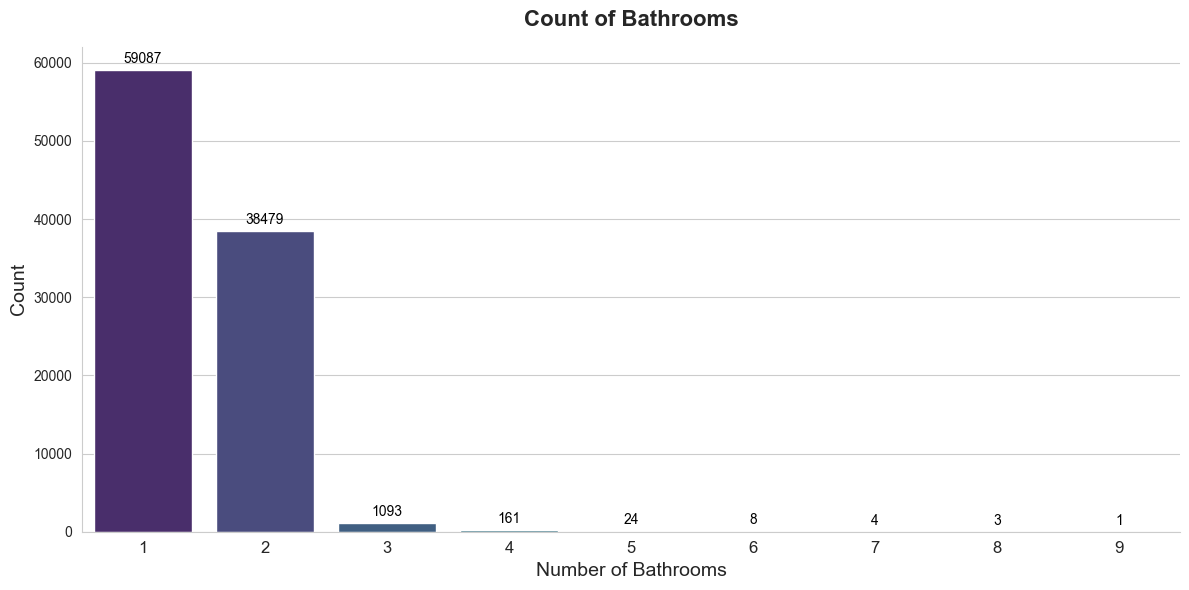

In [21]:
plt.figure(figsize=(12, 6))

sns.countplot(data=df, x='bathrooms', palette='viridis', order=sorted(df['bathrooms'].unique()))

for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%d', label_type='edge', fontsize=10, color='black', padding=3)

plt.title("Count of Bathrooms", fontsize=16, fontweight='bold', pad=15)
plt.xlabel("Number of Bathrooms", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(fontsize=12)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()


The count plot for bathrooms reveals that most properties have either 1 or 2 bathrooms, with single-bathroom listings being the most common. Larger properties with more than 2 bathrooms are extremely rare, emphasizing the prevalence of smaller rental units in the dataset.

## Correlation Analysis

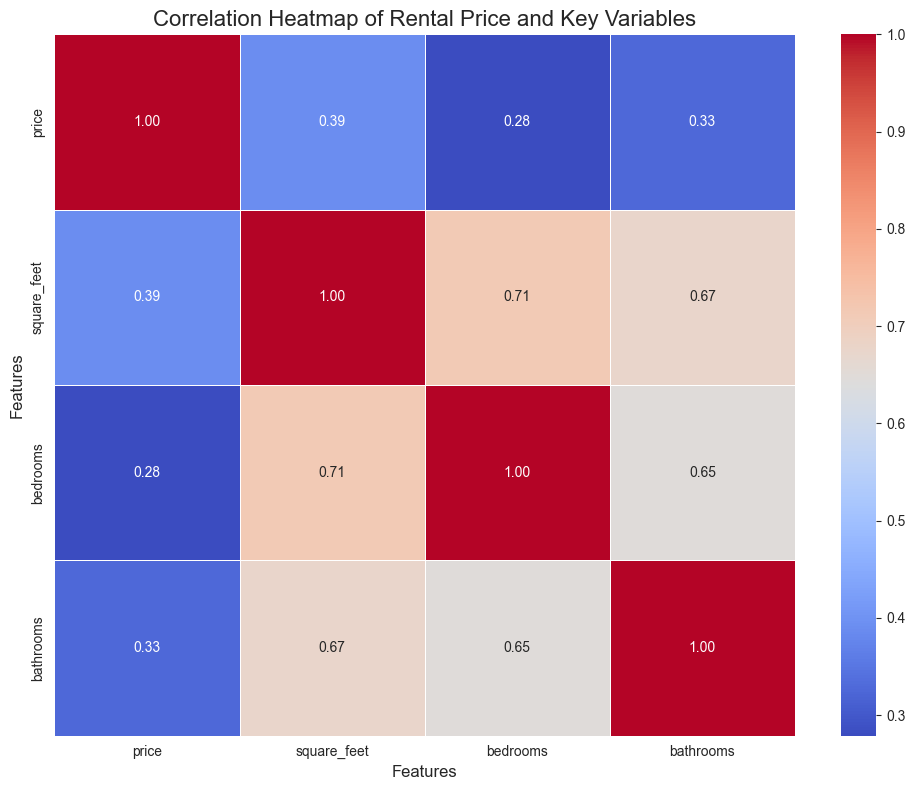

In [22]:
# Perform correlation analysis for key variables
correlation_matrix = df_cleaned[['price', 'square_feet', 'bedrooms', 'bathrooms']].corr()

# Heatmap for correlation visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Rental Price and Key Variables', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()

The heatmap reveals the correlations among key variables like price, square footage, number of bedrooms, and bathrooms. Rental price shows a moderate positive correlation with square footage (0.39), suggesting larger apartments generally command higher rents. However, the relationship between price and the number of bedrooms (0.28) or bathrooms (0.33) is weaker, indicating these factors alone do not have as much influence on rental prices as apartment size.

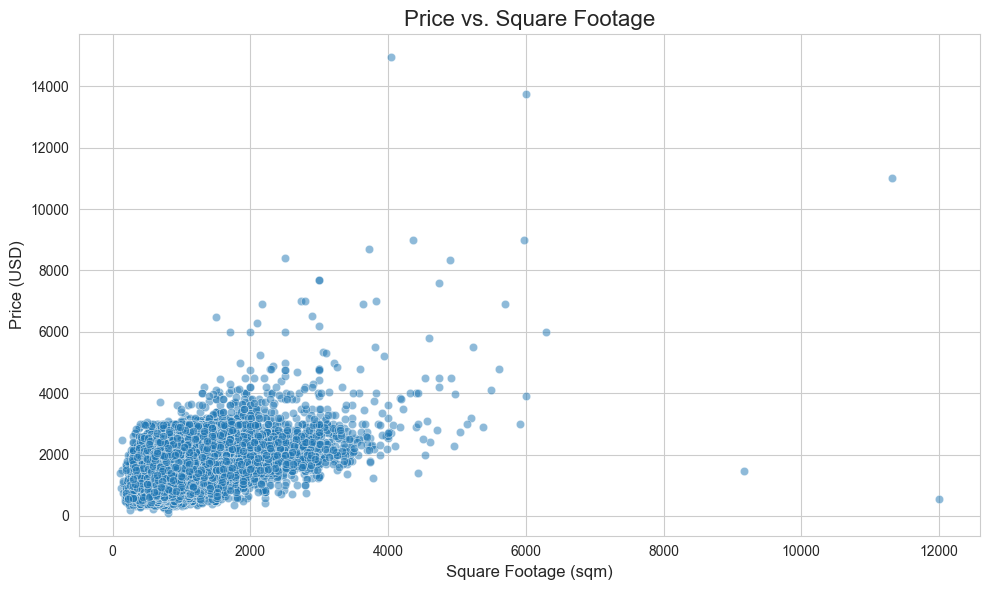

In [23]:
# Scatter plot for Price vs Square Footage
plt.figure(figsize=(10, 6))
sns.scatterplot(x='square_feet', y='price', data=df_cleaned, alpha=0.5)
plt.title('Price vs. Square Footage', fontsize=16)
plt.xlabel('Square Footage (sqm)', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.tight_layout()
plt.show()

This scatter plot demonstrates a positive trend between price and square footage. As the size of an apartment increases, its rental price also tends to rise. However, there are some outliers where large apartments do not necessarily have proportionally high rents, and vice versa, possibly reflecting market variations or unique property characteristics.

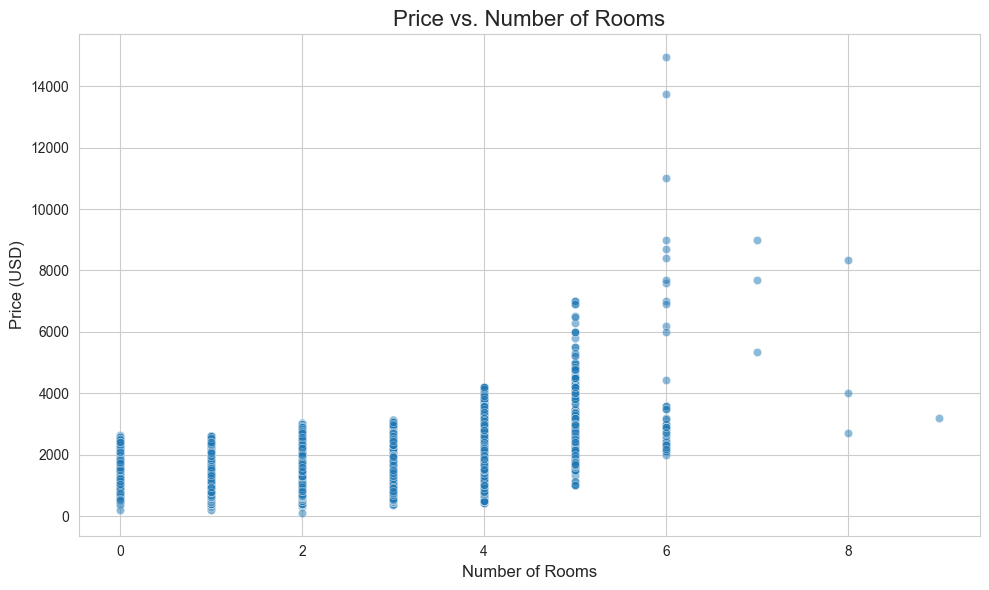

In [24]:
# Scatter plot for Price vs Number of Rooms
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bedrooms', y='price', data=df_cleaned, alpha=0.5)
plt.title('Price vs. Number of Rooms', fontsize=16)
plt.xlabel('Number of Rooms', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.tight_layout()
plt.show()

The scatter plot displays the relationship between rental price and the number of rooms. While a general upward trend is observed, the distribution is less tightly clustered compared to square footage. This indicates that the number of rooms alone is not as strong a predictor of rental price, especially in properties with more than 5 rooms, where the variance in prices is larger.

## Location Based Analysis

C:\Users\deniz\AppData\Local\Temp\ipykernel_29848\3754359016.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mean', y='cityname', data=top_cities, palette='viridis')
c:\Users\deniz\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\deniz\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_ke

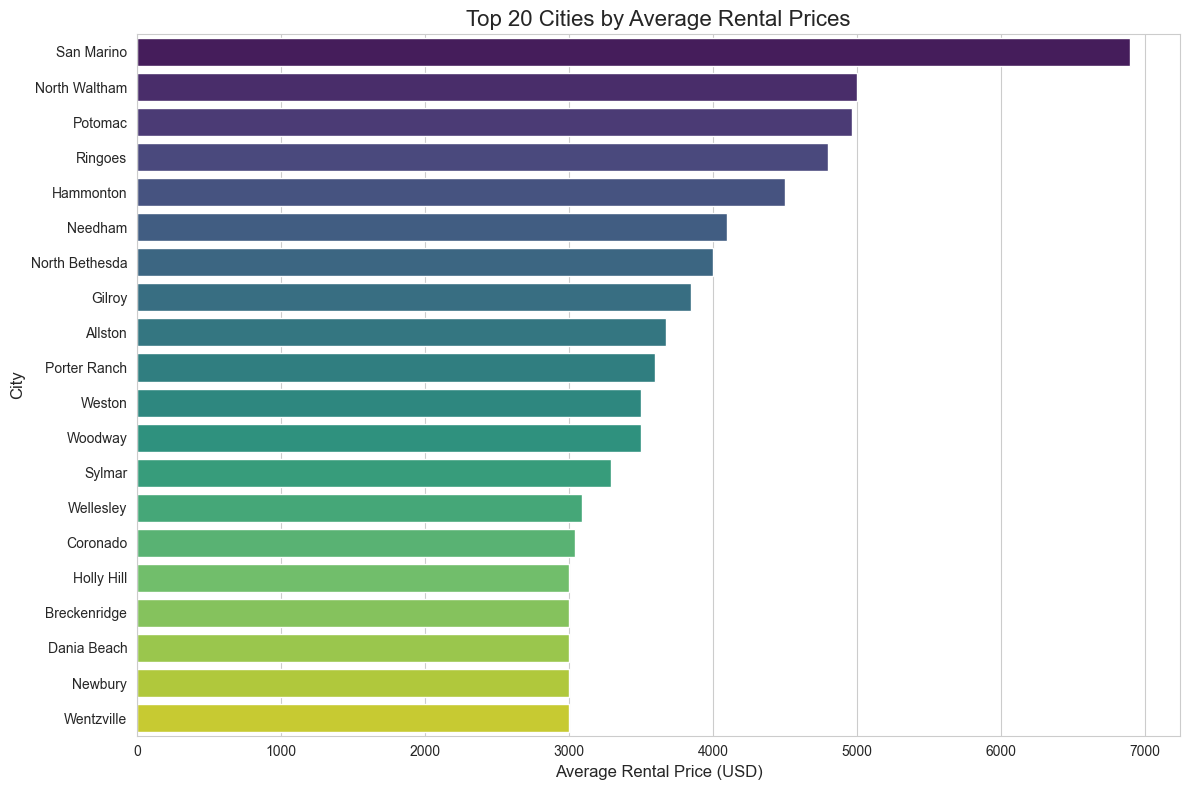

In [25]:
# Perform location-based analysis by dividing the dataset into geographical regions (city-level analysis)
regional_analysis = df_cleaned.groupby('cityname')['price'].agg(['mean', 'median', 'count']).reset_index()

# Sort by average price to identify high-demand and affordable areas
regional_analysis_sorted = regional_analysis.sort_values(by='mean', ascending=False)

# Select top 20 cities with the highest mean rental prices for visualization
top_cities = regional_analysis_sorted.head(20)

# Barplot for average rental prices by city
plt.figure(figsize=(12, 8))
sns.barplot(x='mean', y='cityname', data=top_cities, palette='viridis')
plt.title('Top 20 Cities by Average Rental Prices', fontsize=16)
plt.xlabel('Average Rental Price (USD)', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.tight_layout()
plt.show()

The barplot highlights the cities with the highest average rental prices. San Marino leads with the highest average, followed by North Waltham and Potomac. These cities likely represent luxury markets or areas with limited availability, which drives up average prices. The distribution underscores significant variation in rental affordability across regions, with high-priced markets typically being exclusive or upscale locations.

C:\Users\deniz\AppData\Local\Temp\ipykernel_29848\3509187314.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='cityname', data=top_rented_cities, palette='viridis')
c:\Users\deniz\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\deniz\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_grou

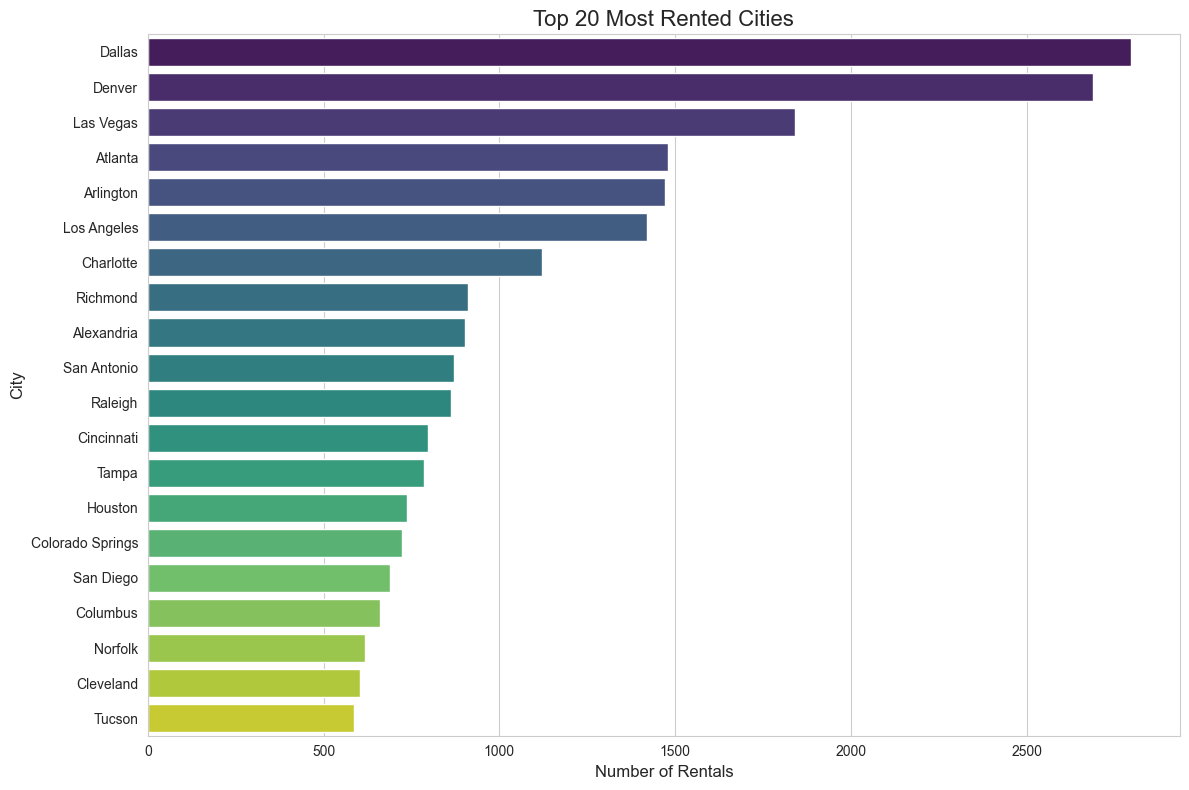

In [26]:
# Perform analysis for top rented cities by count
top_rented_cities = regional_analysis_sorted.sort_values(by='count', ascending=False).head(20)

# Barplot for most rented cities
plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='cityname', data=top_rented_cities, palette='viridis')
plt.title('Top 20 Most Rented Cities', fontsize=16)
plt.xlabel('Number of Rentals', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.tight_layout()
plt.show()

The barplot illustrates the top 20 cities with the highest number of rental listings. Dallas ranks as the most rented city, followed closely by Denver and Las Vegas, indicating high demand for rental properties in these metropolitan areas. The cities in this list represent a mix of established urban centers and growing regions, suggesting diverse rental markets catering to varying demographic and economic conditions.

In [27]:
df_cleaned.to_csv("rents_cleaned.csv")